In [543]:
import pandas as pd
train=pd.read_csv("data/titanic/train.csv")
test=pd.read_csv("data/titanic/test.csv")
sample=pd.read_csv("data/titanic/gender_submission.csv")

# 1. 데이터확인

In [544]:
test
#train.info()
#전부다 벡터로 만들어줘야한다(문자열->숫자)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [545]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [546]:
train.describe()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [547]:
test.isnull().sum()/test.shape[0] #각 컬럼별 NaN의 비율
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# 2. 시각화
### 생존 여부에 대한 분포를 확인


In [548]:
import matplotlib.pyplot as plt
import seaborn as sns

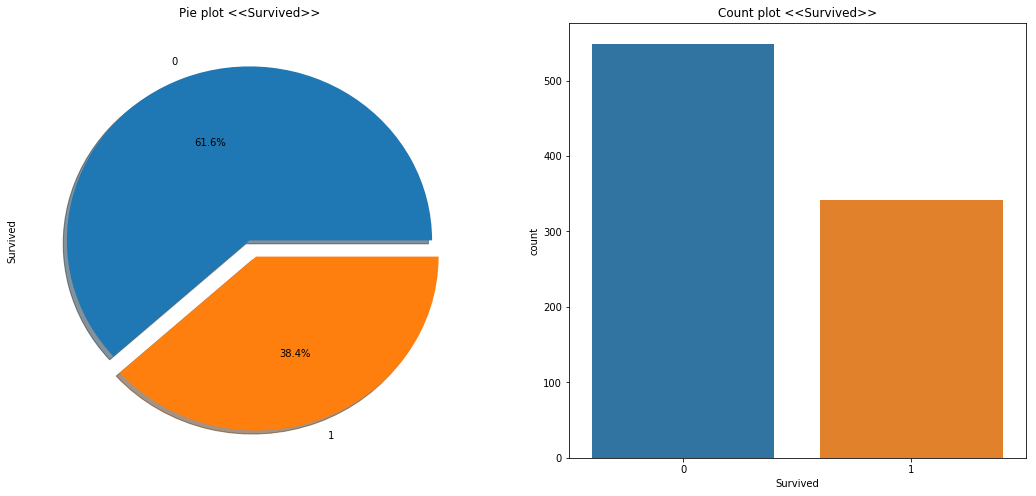

In [549]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
#train['Survived'].value_counts() #0(사망):549, 1(생존):342
train['Survived'].value_counts().plot.pie(ax=ax[0],autopct="%.1f%%",explode=[0,0.1], shadow=True) #ax 전체 플롯에서의 위치를 지정.
ax[0].set_title("Pie plot <<Survived>>")

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title("Count plot <<Survived>>")
plt.show()

In [550]:
def survived_bar_chart(feature):
    #feature에 따른 생존여부를 시각화 해주는 함수
    #ex. feature에 sex가 전달되었으면, sex에 따른 생존 여부를 바차트로 시각화
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar', stacked=True, figsize=(8,4)) #누적 그래프
    
    return

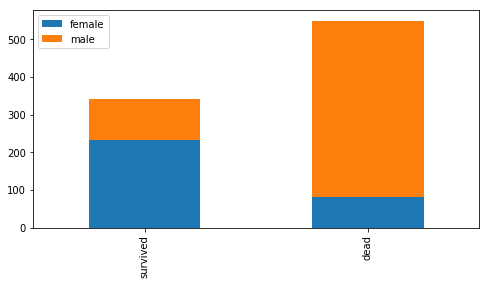

In [551]:
#train[train['Survived']==1]['Pclass'].value_counts()

survived_bar_chart('Sex')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


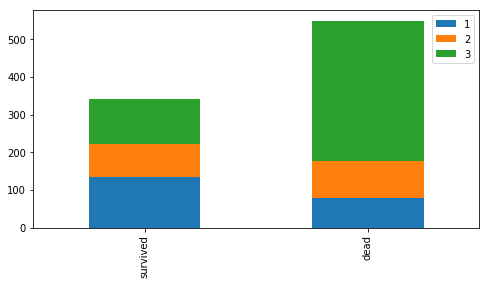

In [552]:
survived_bar_chart('Pclass')
#카테고리로 구성, 순서가 존재(등급)
#groupby, pivot등을 사용해서 그룹단위로 연산이 가능함.
#Pclass별 생존율

#Pclass 그룹 별 데이터 카운트

train[['Pclass', 'Survived']].groupby('Pclass').count() #Pclass 별로 survived 값들의 개수
train[['Pclass', 'Survived']].groupby('Pclass').sum() #Pclass 별로 생존자수

#crosstab을 이용한 숙소 등급 별 생존자수 파악
pd.crosstab(train['Pclass'], train['Survived'], margins=True)


#Pclass 별로 생존율
train[['Pclass', 'Survived']].groupby('Pclass').mean()
#train['Pclass'].value_counts()

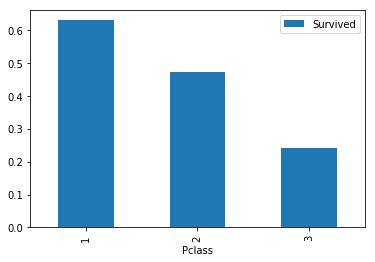

In [553]:
#등급 별 생존율을 시각화
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
#모델을 만들때 등급 정보는 매우 중요하게 사용된다는 것을 알 수 있었다.


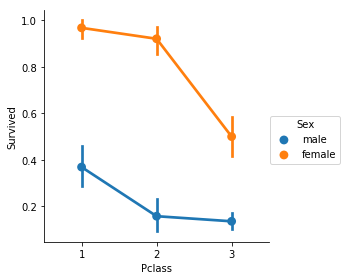

In [554]:
# Sex, Pclass 두 개에 따라 생존한 수의 변화를 시각화
sns.factorplot('Pclass', 'Survived', data=train, hue='Sex')

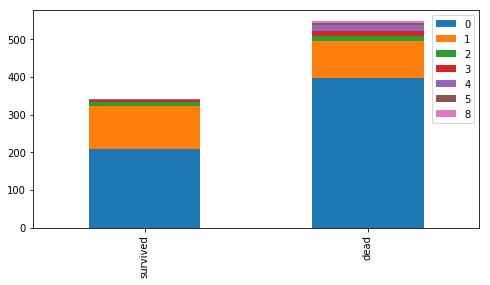

In [555]:
survived_bar_chart('SibSp')

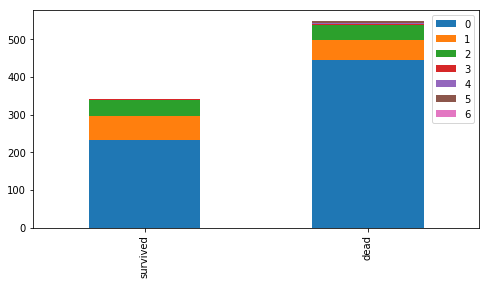

In [556]:
survived_bar_chart('Parch')

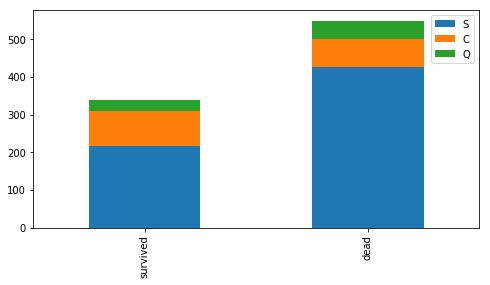

In [557]:
survived_bar_chart('Embarked')

C:\Users\B-17\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


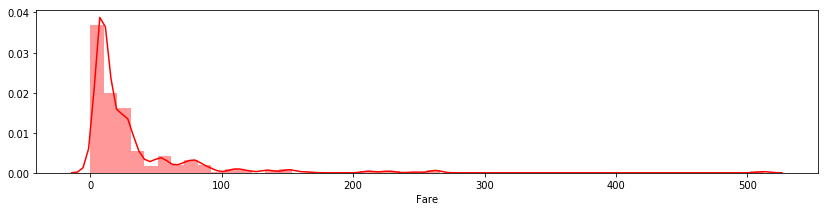

In [558]:
#survived_bar_chart('Fare')
# Fare는 연속데이터이기 때문에 막대그래프로 그리면 안됨...!!!
# histogram으로 그리는게 가장 무난하다
fig, ax=plt.subplots(1,1,figsize=(14,3))
sns.distplot(train['Fare'],ax=ax, color='red')


In [559]:
#Cabin 은 NaN값이 많기 때문에 모델에 포함 시킬 것인지 아닌지를 스스로 판단해야한다.
train['Cabin'].isnull().sum() # NaN의 개수를 구할 수 있다.
train['Cabin'].isnull().sum() / train.shape[0] #약 77%가 NaN이라는 것을 알 수 있다.

#따라서, 모델에서 제외시켜야겠다!!



0.7710437710437711

In [560]:
#Ticket은 NaN값을 가지고 있지 않는다.
#Ticket 컬럼의 값에 대한 특성 공학은 앞으로도 계속 고민해봐야한다...
#train['Ticket'].value_counts()
train_test_data=[train,test]
#print(str(train_test_data['Name'])
import re
p=re.compile('[a-z]+ .')

#그룹으로 나눠서 출력
# for dataset in train_test_data:
#     for name in dataset['Name']:
#         tmp=re.search('(, )([a-zA-Z]+)(.)',name )
#         print(tmp.group(2))

        
#extract
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)')
print(dataset['Title'])
print(train['Title'])

#df['column_name'].str.extract('(\d+)').astype(int)
#주어진 문자열에서 숫자문자를 추출한 후 정수타입으로 변환

# for dataset in train_test_data:
#     for names in dataset['Name'].str.split(","):
#         names[1].split(" ")[1]

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15      Carlo
16         Mr
17         Mr
18       Miss
19     Khalil
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414         y
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object
0             Mr
1            Mrs
2           Miss
3            Mrs
4             Mr
5             Mr
6   

In [561]:
train['Title'].value_counts()


Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Impe             3
Planke           3
Mlle             2
Gordon           2
Col              2
Major            2
Walle            1
der              1
Pelsmaeker       1
Don              1
Mme              1
Messemaeker      1
Steen            1
Capt             1
the              1
Carlo            1
Ms               1
Velde            1
Jonkheer         1
Mulder           1
Billiard         1
Melkebeke        1
Cruyssen         1
Shawah           1
Name: Title, dtype: int64

In [562]:
# title_mapping={
#     'Mr':0,'Miss':1,'Mrs':2,
#     'Master':3,'Dr':3,'Rev':3,'y':3, 'Impe':3,'Planke':3,'Mlle':3,'Gordon':3, 'Col':3,
#     'Major':3,'Walle':3, 'der':3,'Pelsmaeker':3,'Don':3, 'Mme':3,'Messemaeker':3,'Steen':3,
#     'Capt':3, 'the':3,'Carlo':3, 'Ms':3,'Velde':3,'Jonkheer':3, 'Mulder':3, 'Billiard':3, 'Melkebek':3,
#     'Cruyssen':3,
#     'Shawah':3,
# }

# for dataset in train_test_data:
#     dataset['Title']=dataset['Title'].map(title_mapping)
    
# train.head()

In [563]:
train['Title'].value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Impe             3
Planke           3
Mlle             2
Gordon           2
Col              2
Major            2
Walle            1
der              1
Pelsmaeker       1
Don              1
Mme              1
Messemaeker      1
Steen            1
Capt             1
the              1
Carlo            1
Ms               1
Velde            1
Jonkheer         1
Mulder           1
Billiard         1
Melkebeke        1
Cruyssen         1
Shawah           1
Name: Title, dtype: int64

In [564]:

#test['Title'].value_counts()
title_mapping={
    'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'y':3,'Planke':3,'Impe':3,'Mlle':3,'Gordon':3,
    'Col':3,'Major':3,'Pelsmaeker':3,'Jonkheer':3,'Cruyssen':3,'Walle':3,'Mme':3,'Carlo':3,'Ms':3,
    'Mulder':3,'Capt':3,'Steen':3,'Don':3,'Billiard':3,'Velde':3,'Shawah':3,'Messemaeker':3,
    'Melkebeke':3,'der':3,'the':3,}
for dataset in train_test_data:
    dataset["Title"]=dataset["Title"].map(title_mapping)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [565]:
#train['Title'].replace(['Ms'], ["Miss"], inplace=True)

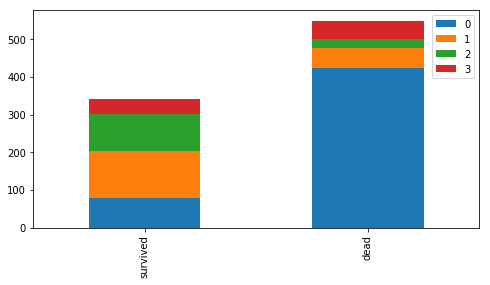

In [566]:
survived_bar_chart('Title')

In [567]:
train
test.drop('Name', axis=1, inplace=True)

In [568]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0
5,897,3,male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,female,30.0,0,0,330972,7.6292,NaN,Q,1.0
7,899,2,male,26.0,1,1,248738,29.0000,NaN,S,0.0
8,900,3,female,18.0,0,0,2657,7.2292,NaN,C,2.0
9,901,3,male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.0


In [569]:
#male : 0, female: 1
sex_mapping={"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

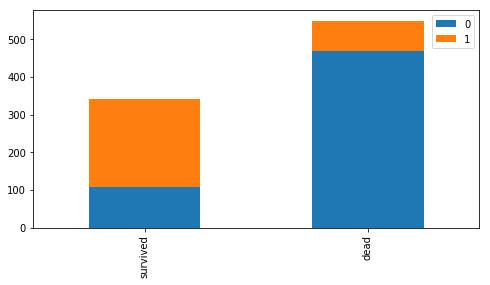

In [570]:
survived_bar_chart('Sex')

In [571]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)
#transform :: 

In [572]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     35.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     21.0
29     30.0
       ... 
861    21.0
862    48.0
863    21.0
864    24.0
865    42.0
866    27.0
867    31.0
868    18.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [573]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


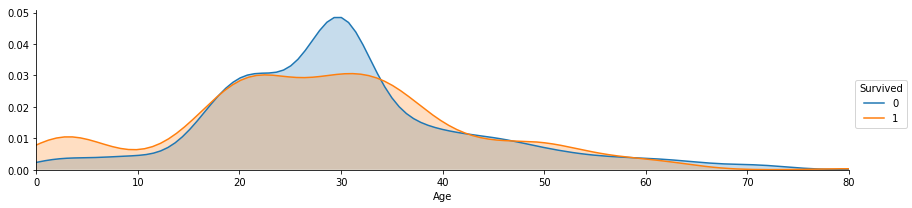

In [574]:
# 나이에 따른 생존
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()
facet.set(xlim=(0, train['Age'].max()))

(0, 20)

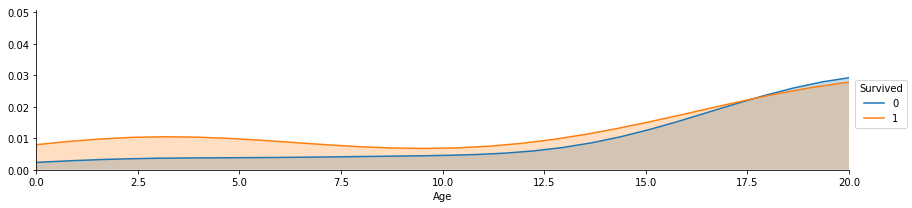

In [602]:
# 나이에 따른 생존
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()
#acet.set(xlim=(0, train['Age'].max()))
plt.xlim(0,20)

In [576]:
train.Age.fillna(10, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          415 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [577]:
#binning : 구간 나누기
#child : 0, young : 1, adult:2, mid-age:3, senior:4

for dataset in train_test_data:
    if dataset['Age'][1]<13.0:
        dataset['Age']=0
    elif dataset['Age'][1]>=13.0 and dataset['Age'][1]<19.0:
         dataset['Age']=1
    elif dataset['Age'][1]>=19.0 and dataset['Age'][1]<36.0:
        dataset['Age'][1]=2
    elif dataset['Age'][1]>=36.0 and dataset['Age'][1]<61.0:
        dataset['Age'][1]=3
    else: dataset['Age'][1]=4
#     dataset.loc[dataset['Age'][1]<13, "Age"]=0,
#     dataset.loc[(dataset['Age'][1]>=13 & dataset['Age'][1]<19),"Age"]=1,
#     dataset.loc[(dataset['Age'][1]>=19 & dataset['Age'][1]<36),"Age"]=2,
#     dataset.loc[(dataset['Age'][1]>=36 & dataset['Age'][1]<61),"Age"]=3,
#     dataset.loc[dataset['Age'][1]>=61, "Age"]=4    

C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [578]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts() #1e등급실 항구의 합
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts() #1e등급실 항구의 합
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts() #1e등급실 항구의 합

print(Pclass1, Pclass2, Pclass3)


S    127
C     85
Q      2
Name: Embarked, dtype: int64 S    164
C     17
Q      3
Name: Embarked, dtype: int64 S    353
Q     72
C     66
Name: Embarked, dtype: int64


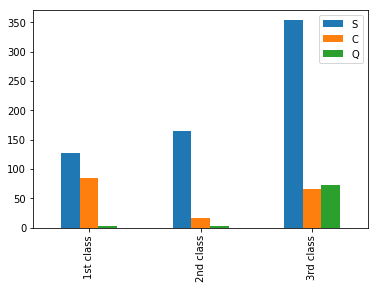

In [579]:
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar')

In [580]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna("S")
# dataset['Embarked']를 참조하여 s->0, c->1, q->2로 일괄 변환 하기(map사용해서)

emData={
    'S':0,'C':1,'Q':2
}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(emData)
    


In [581]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


(20, 100)

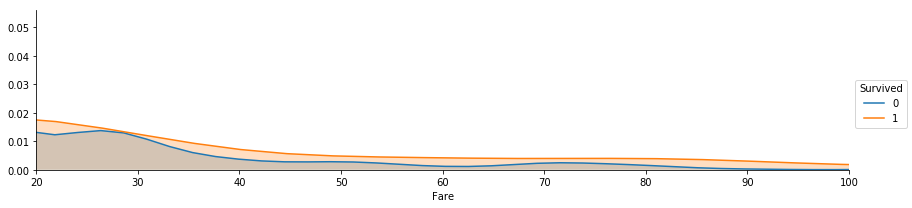

In [582]:
# 나이에 따른 생존
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend()
facet.set(xlim=(0, train['Fare'].max()))
plt.xlim(20,100)

(20, 100)

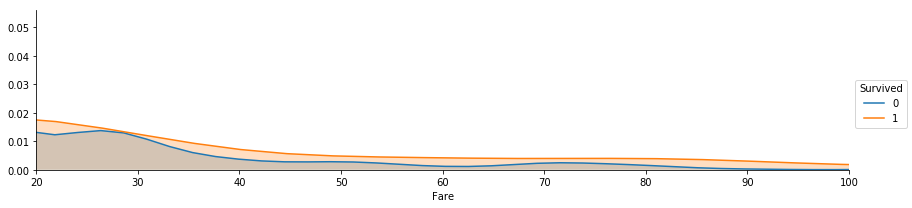

In [583]:
# 나이에 따른 생존
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend()
facet.set(xlim=(0, train['Fare'].max()))
plt.xlim(20,100)

In [591]:
for dataset in train_test_data:
    #print(dataset['Fare'][1])
    if dataset['Fare'][1]<=20.0: dataset['Fare'][1]=0
    elif dataset['Fare'][1]>20.0 and dataset['Fare'][1]<=30.0 : dataset['Fare'][1]=1
    elif dataset['Fare'][1]>30.0 and dataset['Fare'][1]<=100.0: dataset['Fare'][1]=2
    else : dataset['Fare'][1]=3
#     dataset.loc[dataset['Fare'][1]<=20.0, "Fare"]=0,
#     dataset.loc[(dataset['Fare'][1]>20.0 & dataset['Fare'][1]<=30.0),"Fare"]=1,
#     dataset.loc[(dataset['Fare'][1]>30.0 & dataset['Fare'][1]<=100.0),"Fare"]=2,
#     dataset.loc[(dataset['Fare'][1]>100.0),"Fare"]=3    

C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [588]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B18                2
D35                2
E8                 2
D36                2
D20                2
F G73              2
C92                2
E44                2
E25                2
B58 B60            2
C126               2
B5                 2
C93                2
B51 B53 B55        2
C2                 2
C68                2
E33                2
B57 B59 B63 B66    2
B49                2
F4                 2
C65                2
D33                2
                  ..
E38                1
E17                1
B69                1
D48                1
C87                1
C85                1
C70                1
D9                 1
D10 D12            1
C91                1
B39                1
C99                1
C148               1
B82 B84            1
D47                1
E49                1
B38          

In [600]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [608]:
Pclass1=train[train['Pclass']==1]['Cabin']
Pclass2=train[train['Pclass']==2]['Cabin']
Pclass3=train[train['Pclass']==3]['Cabin']

In [609]:
print(Pclass1, Pclass2, Pclass3)

1        C
3        C
6        E
11       C
23       A
27       C
30     NaN
31       B
34     NaN
35     NaN
52       D
54       B
55       C
61       B
62       C
64     NaN
83     NaN
88       C
92       E
96       A
97       D
102      D
110      C
118      B
124      D
136      D
137      C
139      B
151      C
155    NaN
      ... 
763      B
765      D
766    NaN
779      B
781      B
782      D
789      B
793    NaN
796      D
802      B
806      A
809      E
815      B
820      B
822    NaN
829      B
835      E
839      C
842    NaN
849      C
853      D
856    NaN
857      E
862      D
867      A
871      D
872      B
879      C
887      B
889      C
Name: Cabin, Length: 216, dtype: object 9      NaN
15     NaN
17     NaN
20     NaN
21       D
33     NaN
41     NaN
43     NaN
53     NaN
56     NaN
58     NaN
66       F
70     NaN
72     NaN
78     NaN
84     NaN
98     NaN
99     NaN
117    NaN
120    NaN
122    NaN
123      E
133    NaN
134    NaN
135    NaN
144    NaN
145

In [610]:
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [612]:
cabin_mapping={'A':0, "B":0.4, "C":0.8, "D":1.2,"E":1.6, "F":2, "G":2.4, "T":2.8}

In [613]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [614]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,0.0000,NaN,0,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,0,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,0,2.0
5,897,3,0,14.0,0,0,7538,9.2250,NaN,0,0.0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,2,1.0
7,899,2,0,26.0,1,1,248738,29.0000,NaN,0,0.0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,1,2.0
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,0,0.0


In [615]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform("median"), inplace=True)


In [622]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

In [623]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,34.5,0,0,330911,7.8292,2.0,2,0.0,1
1,893,3,1,3.0,1,0,363272,0.0000,2.0,0,2.0,2
2,894,2,0,62.0,0,0,240276,9.6875,2.0,2,0.0,1
3,895,3,0,27.0,0,0,315154,8.6625,2.0,0,0.0,1
4,896,3,1,22.0,1,1,3101298,12.2875,2.0,0,2.0,3
5,897,3,0,14.0,0,0,7538,9.2250,2.0,0,0.0,1
6,898,3,1,30.0,0,0,330972,7.6292,2.0,2,1.0,1
7,899,2,0,26.0,1,1,248738,29.0000,2.0,0,0.0,3
8,900,3,1,18.0,0,0,2657,7.2292,2.0,1,2.0,1
9,901,3,0,21.0,2,0,A/4 48871,24.1500,2.0,0,0.0,3


In [624]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2,5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['Familysize']=dataset['FamilySize'].map(family_mapping)

In [626]:
train=train.drop(['Ticket','SibSp','Parch'],axis=1)

In [630]:
train_data=train.drop('Survived',axis=1)

In [634]:
target=train['Survived']

In [636]:
train_data.shape

(892, 11)

In [638]:
target.shape

(892,)

In [643]:
train_data=train_data.drop('Name', axis=1)

In [644]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Familysize
0,3,0,22.0,7.2500,2.0,0,0,2,0.4
1,1,1,3.0,0.0000,0.8,1,2,2,0.4
2,3,1,26.0,7.9250,2.0,0,1,1,0.0
3,1,1,35.0,53.1000,0.8,0,2,2,0.4
4,3,0,35.0,8.0500,2.0,0,0,1,0.0
5,3,0,30.0,8.4583,2.0,2,0,1,0.0
6,1,0,54.0,51.8625,1.6,0,0,1,0.0
7,3,0,2.0,21.0750,2.0,0,3,5,1.6
8,3,1,27.0,11.1333,2.0,0,2,3,0.8
9,2,1,14.0,30.0708,1.8,1,2,2,0.4
